In [1]:
import os
os.chdir('..')

In [2]:
from torchvision.datasets import MNIST
import torch
import torch.nn as nn
import torchvision.transforms as TF
from eXNN.InnerNeuralViz import api

In [3]:
train_ds = MNIST(root='./.cache', train=True, download=True, transform=TF.ToTensor()) 
test_ds = MNIST(root='./.cache', train=False, download=False, transform=TF.ToTensor())

In [4]:
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=36, shuffle=True)
test_dl = torch.utils.data.DataLoader(test_ds, batch_size=36, shuffle=False)

In [5]:
num_classes = 10

# Fully-connected NN

In [6]:
model = nn.Sequential(nn.Linear(28*28, 256), 
                       nn.ReLU(), nn.Linear(256, 64), 
                       nn.ReLU(), nn.Linear(64, num_classes))

In [7]:
layers = ['1', '3']
mode = 'pca'

## real data

In [8]:
data, labels = next(iter(train_dl))
data = torch.flatten(data, start_dim=1)

In [9]:
visualizations = api.VisualizeNetSpace(model, mode, data, layers, labels=labels)

### display

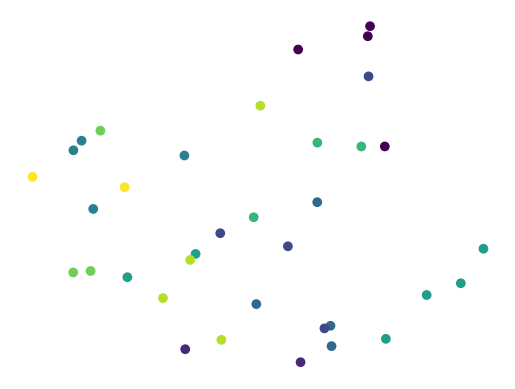

In [10]:
visualizations['input']

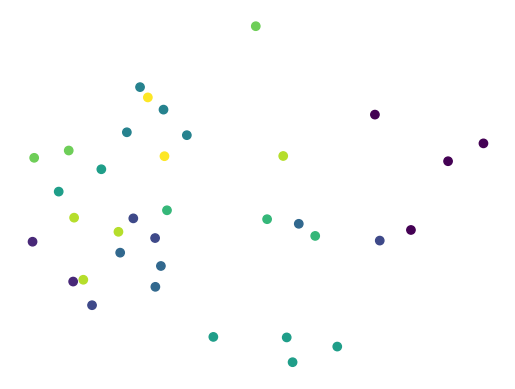

In [11]:
visualizations['1']

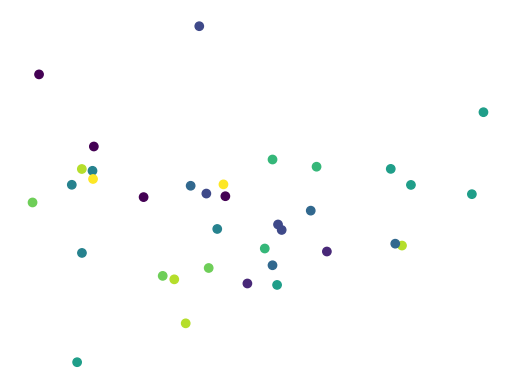

In [12]:
visualizations['3']

## syntetic data

In [13]:
data = api.get_random_input([36, 784])

In [14]:
visualizations = api.VisualizeNetSpace(model, mode, data, layers)

### display

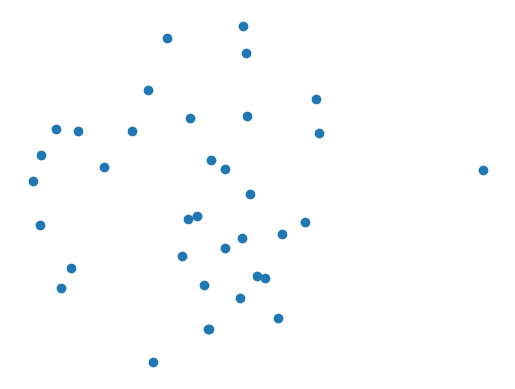

In [15]:
visualizations['input']

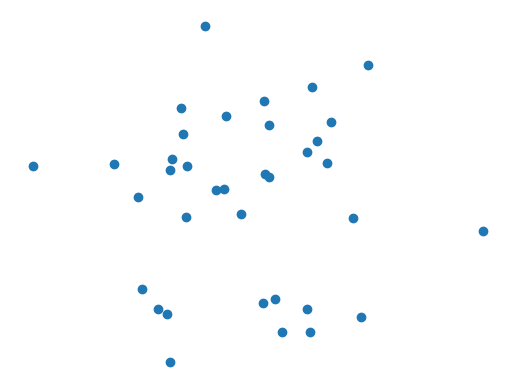

In [16]:
visualizations['1']

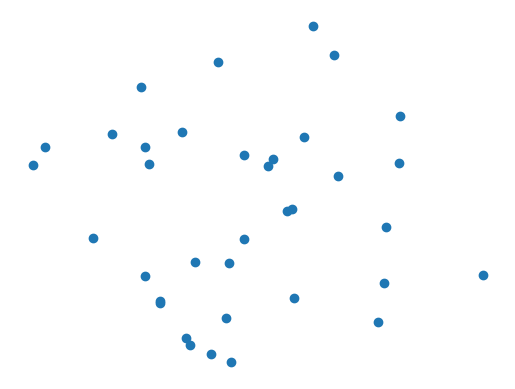

In [17]:
visualizations['3']

# CNN

In [18]:
model = nn.Sequential(nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3),
                      nn.ReLU(),
                      nn.MaxPool2d(kernel_size=2, stride=2),
                      nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
                      nn.ReLU(),
                      nn.MaxPool2d(kernel_size=2, stride=2),
                      nn.AdaptiveAvgPool2d(output_size=1),
                      nn.Flatten(),
                      nn.Linear(64, num_classes))

In [19]:
mode = 'umap'

## real data

In [20]:
data, labels = next(iter(train_dl))

In [21]:
visualizations = api.VisualizeNetSpace(model, mode, data, labels=labels)

### display

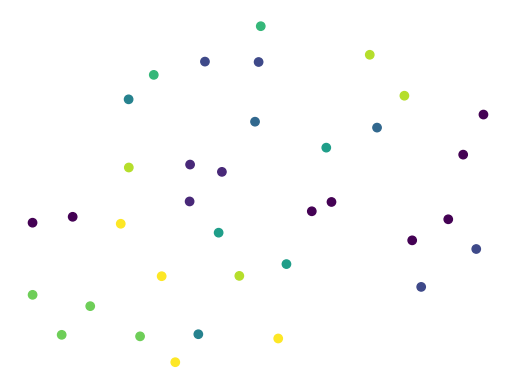

In [22]:
visualizations['input']

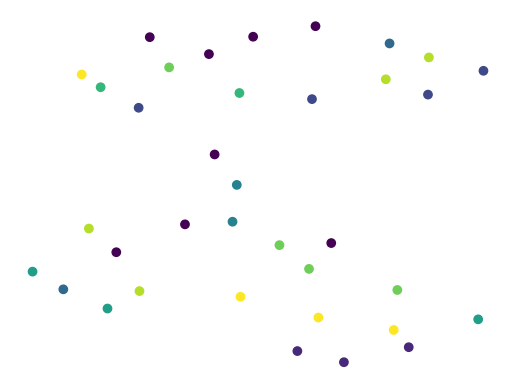

In [23]:
visualizations['6']

## synthetic data

In [24]:
data = api.get_random_input([36, 1, 28, 28])

In [25]:
visualizations = api.VisualizeNetSpace(model, mode, data)

### display

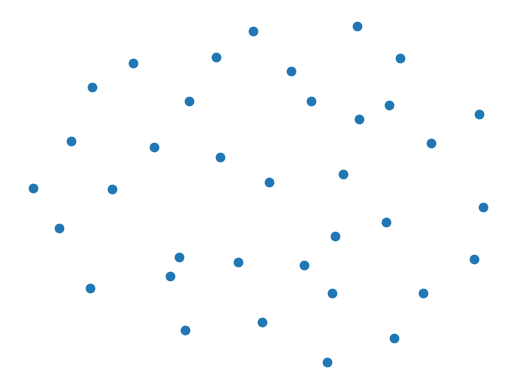

In [26]:
visualizations['input']

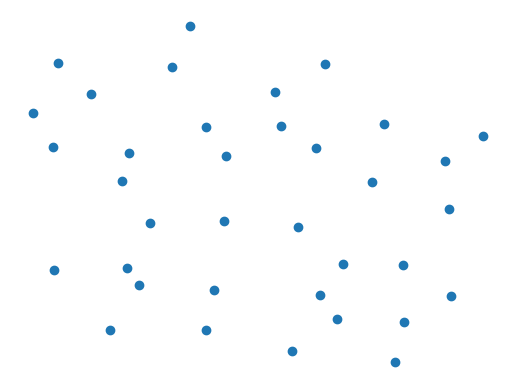

In [27]:
visualizations['6']